In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [2]:
train = pd.read_csv('data/BigMart-Train.csv')
test = pd.read_csv('data/BigMart-Test.csv')

print(train.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [3]:
train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test], ignore_index= True)

print(f"Train: {train.shape} \t Test: {test.shape} \t Merged: {data.shape}")

data.head()

Train: (8523, 13) 	 Test: (5681, 12) 	 Merged: (14204, 13)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [6]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [8]:
data["Outlet_Age"] = 2022 - data["Outlet_Establishment_Year"]

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,35


In [9]:
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [10]:
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [11]:
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [12]:
# filling NaN values and missing values

data["Outlet_Size"] = data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())

data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,35


<AxesSubplot:>

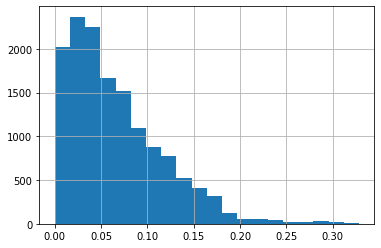

In [13]:
data["Item_Visibility"].hist(bins=20)

In [14]:

Q1 = data["Item_Visibility"].quantile(0.25)
Q3 = data["Item_Visibility"].quantile(0.75)

IQR = Q3 - Q1

fill_data = data.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

print(f"Original Data: {data.shape} \t Without Outliers: {fill_data.shape}")

fill_data.head()

Original Data: (14204, 14) 	 Without Outliers: (13943, 14)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,35


In [15]:
data = fill_data
print(f'New Data Shape: {data.shape}')

New Data Shape: (13943, 14)


In [16]:
data["Item_Visibility_bins"] = pd.cut(data["Item_Visibility"], [0.00, 0.065, 0.13, 0.2], labels= ['Low Viz', 'Viz', 'High Viz'])
data["Item_Visibility_bins"].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [17]:
data["Item_Visibility_bins"] = data["Item_Visibility_bins"].replace(np.nan, 'Low Viz', regex = True)
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(['low fat', "LF" ], 'Low Fat')
data["Item_Fat_Content"] =  data["Item_Fat_Content"].replace("reg", 'Regular')

In [18]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [19]:
lencoder = LabelEncoder()

data["Item_Fat_Content"] = lencoder.fit_transform(data["Item_Fat_Content"])
data["Item_Visibility_bins"] = lencoder.fit_transform(data["Item_Visibility_bins"])
data["Outlet_Size"] = lencoder.fit_transform(data["Outlet_Size"])
data["Outlet_Location_Type"] = lencoder.fit_transform(data["Outlet_Location_Type"])

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age,Item_Visibility_bins
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,train,23,1
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,train,13,1
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,train,23,1
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,train,24,3
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,train,35,3


In [20]:
print(data["Outlet_Type"].unique())

dummy = pd.get_dummies(data["Outlet_Type"])
dummy.head()


['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [21]:
data["Item_Type_Combined"] = data["Item_Identifier"].apply(lambda x: x[0:2])
data["Item_Type_Combined"] = data["Item_Type_Combined"].map({"FD": "Food",
                                                             "NC": "Non-Consumable",
                                                             "DR": "Drinks"})
print(data["Item_Type_Combined"].value_counts())

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64


In [22]:
data.shape

(13943, 16)

In [23]:
data = pd.get_dummies(data,  columns=["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Size", "Outlet_Type", "Item_Type_Combined"])
print(data.dtypes)

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int32
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Typ

In [24]:
data.drop(["Item_Type", "Outlet_Establishment_Year"], axis=1, inplace=True)

In [32]:
train = data.loc[data["source"] == "train"]
test = data.loc[data["source"] == "test"]

train.drop(["source"], axis= 1, inplace= True)
test.drop(["source"], axis= 1, inplace=True)

In [26]:
X_train = train.drop(["Item_Identifier", "Outlet_Identifier", "Item_Outlet_Sales"], axis= 1)
y_train = train.Item_Outlet_Sales

In [27]:
X_test = test.drop(["Item_Identifier", "Outlet_Identifier", "Item_Outlet_Sales"], axis= 1)
y_test = test.Item_Outlet_Sales

In [28]:
xTrain, xValidation, yTrain, yValidation = model_selection.train_test_split(X_train, y_train, test_size= 0.2, random_state=42)

linModel = LinearRegression()
linModel.fit(xTrain, yTrain)

print( xTrain.columns ,linModel.coef_)
print(linModel.intercept_)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age',
       'Item_Visibility_bins', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Combined_Drinks',
       'Item_Type_Combined_Food', 'Item_Type_Combined_Non-Consumable'],
      dtype='object') [-1.74935365e+00 -4.20133685e+02  1.57724158e+01 -3.43315585e+01
 -1.43326536e+00 -8.54787588e+00  8.54787588e+00  2.19226296e+02
  4.06643641e+01 -2.59890660e+02  5.79306844e+02 -3.25219749e+02
 -2.54087096e+02 -1.64972611e+03 -1.76085808e+02 -3.81033551e+02
  2.20684547e+03 -6.04892514e-01  2.90918734e+01 -2.84869809e+01]
1189.459602662107


In [29]:
predictions = linModel.predict(xValidation)
print(f"RMS: {math.sqrt(mean_squared_error(yValidation, predictions))}")

RMS: 1118.1646734636658


In [30]:
y_sales_pred = linModel.predict(X_test)

test_predications =  pd.DataFrame({
    "Item_Identifier": test['Item_Identifier'],
    "Outlet_Identifier": test['Outlet_Identifier'],
    "Item_Outlet_Sales":y_sales_pred
}, columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])

In [31]:
test_predications.head(10)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,1798.635361
8524,FDW14,OUT017,1596.631309
8525,NCN55,OUT010,1836.430399
8526,FDQ58,OUT017,2658.954765
8527,FDY38,OUT027,5197.866367
8528,FDH56,OUT046,1960.200981
8529,FDL48,OUT018,533.476575
8530,FDC48,OUT027,2809.527151
8531,FDN33,OUT045,1524.208670
8532,FDA36,OUT017,3167.836413
